- 차원 축소: 고차원을 저차원으로 축소
- 특성이 많으면 모델의 성능이 높아지면서 훈련 데이터에 쉽게 과적합 된다.
- 이를 방직하기 위해 차원 축소를 통해 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 비지도 학습 모델의 성능을 향상
- 주 알고리즘은 주성분분석 (PCA)

cf) 주성분 분석과 머신러닝에서의 변수선택의 차이점
- 주성분 분석의 목표는 차원을 줄이되 정보 손실을 최소화 하고, 변수들의 선형 결합으로 주성분을 생성한다. 따라서 새로운 특성이 만들어진다.
- 머신러닝에서의 변수선택은 성능 향상을 위해 불필요한 변수를 제거하는 것이고, 변수 자체를 직접 제거하게 된다.

In [1]:
# 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것 (2차원의 공간에서 데이터를 가장 잘 설명할 수 있는 직선 찾기)
# 잘 설명하는 벡터를 주성분으로 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fruits = np.load('fruits_300.npy')

In [13]:
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components = 50) # 주성분의 개수 지정

In [19]:
pca.fit(fruits_2d)

PCA(n_components=50)

In [23]:
# 주성분
pca.components_.shape # 첫번쨰 차원은 지정한 50개의 주성분, 두번쨰 차원은 원본 데이터의 특성 개수와 같은 10,000

(50, 10000)

In [25]:
def draw_fruits(arr, ratio = 1):
    n = len(arr) # 샘플의 개수
    rows = int(np.ceil(n/10)) # 한 줄에 10개씩 이미지 그리기. 샘플개수를 10으로 나누어 전체 행 개수를 계산
    cols = n if rows < 2 else 10 # 행이 1개이면 샘플 개수만큼 열을 생성, 그렇지 않으면 10개의 열로 생성

    fig, axs = plt.subplots(rows, cols, figsize= (cols*ratio, rows*ratio), squeeze = False) # 그래프 사이즈

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n: # n개까지만 그리기
                axs[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')
            axs[i,j].axis('off')
    
    plt.show()    

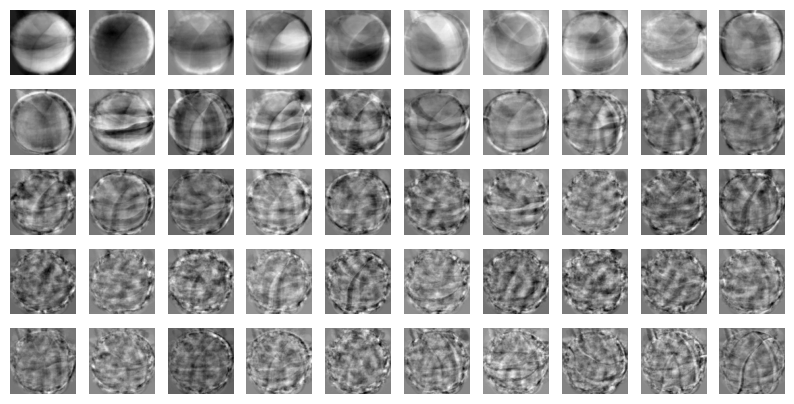

In [29]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [31]:
# 원본 데이터의 10,000개의 특성을 50개로 줄이기
fruits_2d.shape

(300, 10000)

In [33]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [35]:
# 원본 데이터로 복구
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

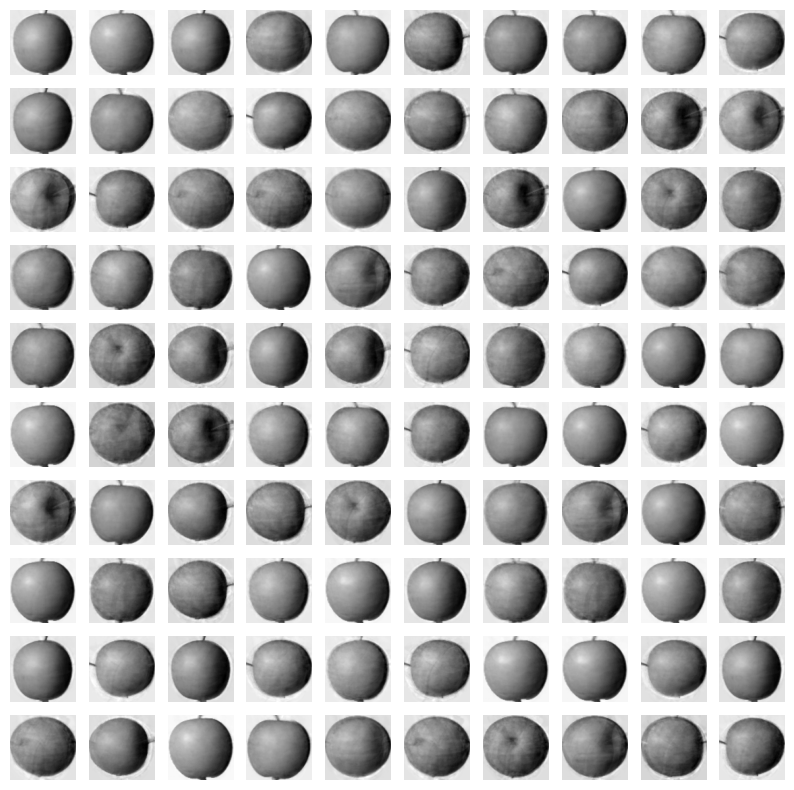

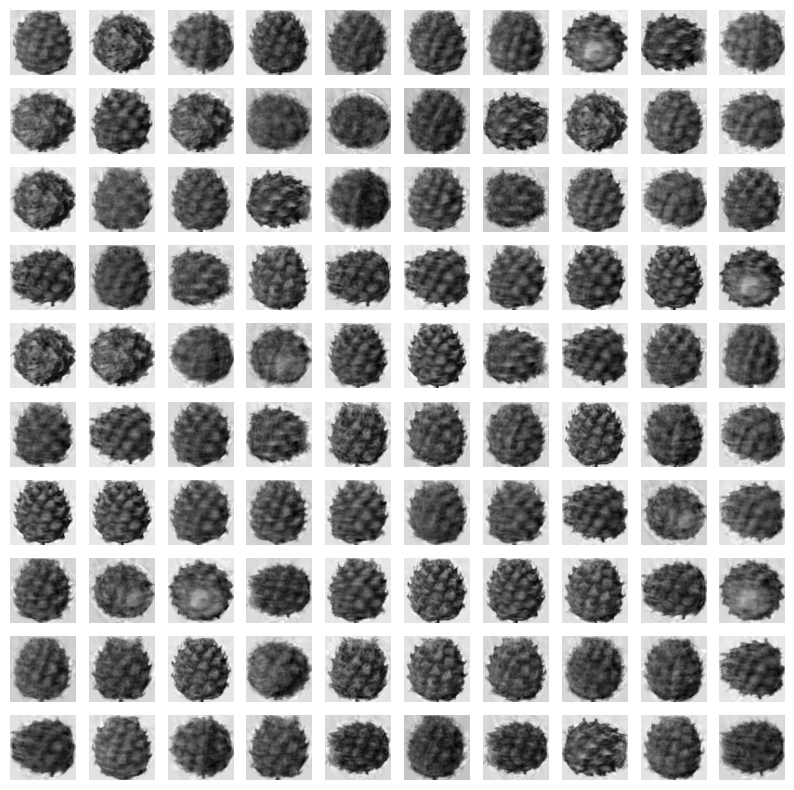

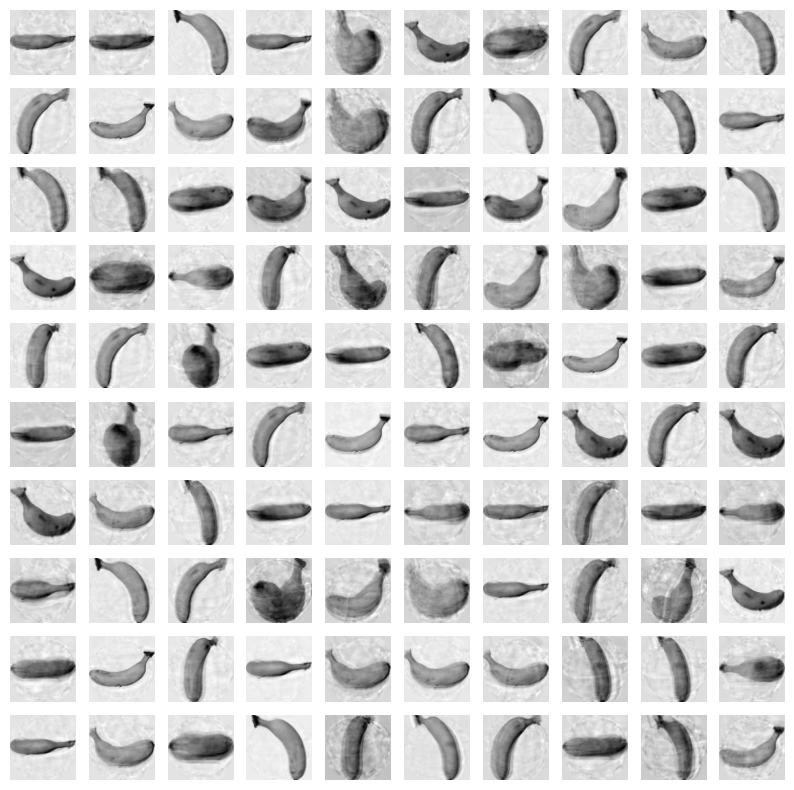

In [37]:
# 100 * 100 크기로 바꾸어 100개씩 나누어 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

# 설명된 분산: 주성분이 원본 데이터의 분산으 ㄹ얼마나 잘 나타내는지 기록한 값
# 첫번째 주성분의 설명된 분산이 가장 큼
np.sum(pca.explained_variance_ratio_)

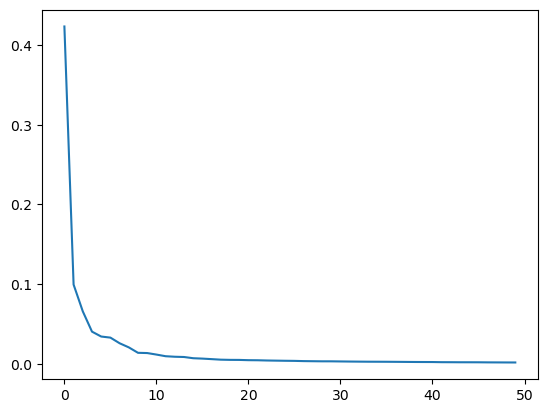

In [47]:
# 설명된 분산의 비율을 그래프로 그리면 적절한 주성분의 개수를 찾을 수 있다.
plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 대부분의 분산을 표현하고 있음

## PCA로 차원 축소된 데이터를 사용해 모델 훈련

#### 로지스틱 회귀

In [55]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

In [59]:
# 사과는 0, 파인애플은 1, 바나나는 2로 지정하여 타깃값 데이터 만들기
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [61]:
from sklearn.model_selection import cross_validate

In [67]:
# 원본 데이터
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.17139806747436523


In [69]:
# PCA로 축소한 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.01332077980041504


정확도가 똑같고 훈련시간이 감소

In [72]:
# PCA는 n_components의 매개변수에 분산의 비율을 입력할 수 있음
# 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [76]:
# 2개의 특성만으로 우너본 데이터에 있는 분산의 50%를 표현
pca.n_components_

2

In [78]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [80]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.02634296417236328


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

#### k-means 클러스터

In [83]:
from sklearn.cluster import KMeans

In [85]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [89]:
np.unique(km.labels_, return_counts = True)

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

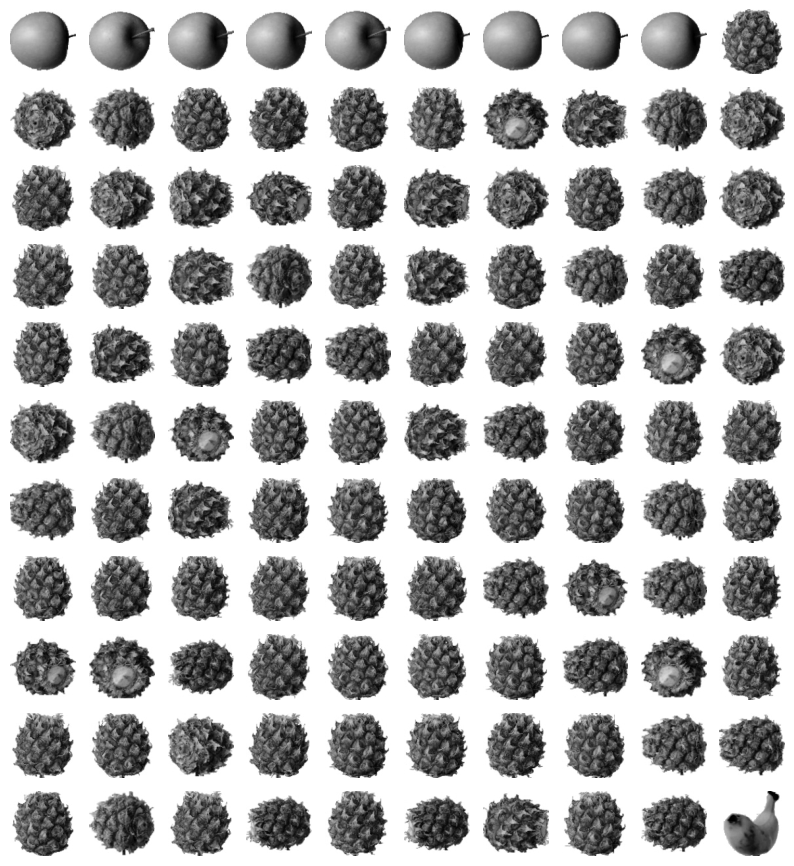

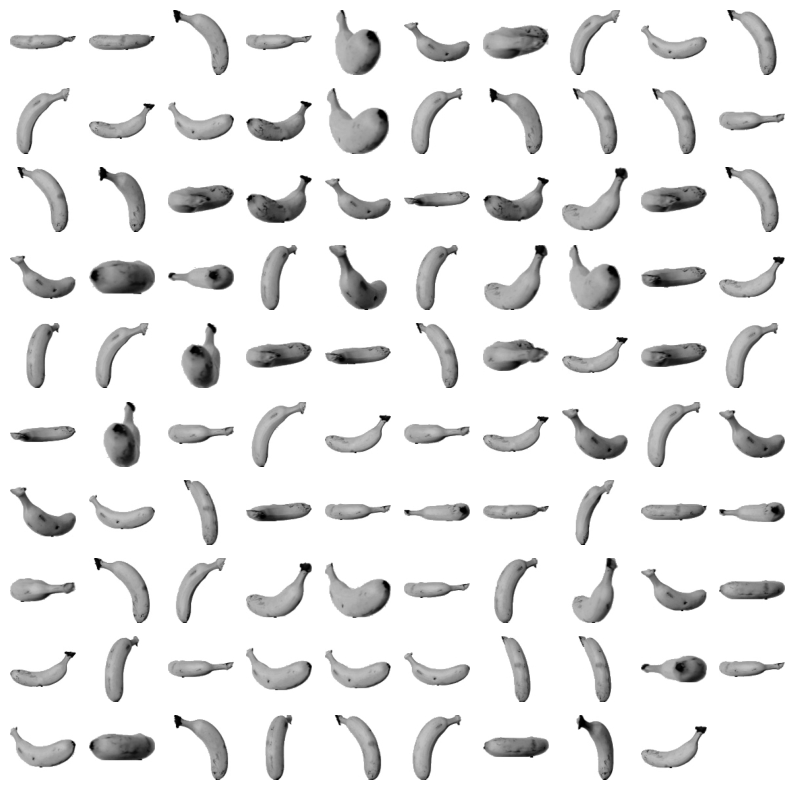

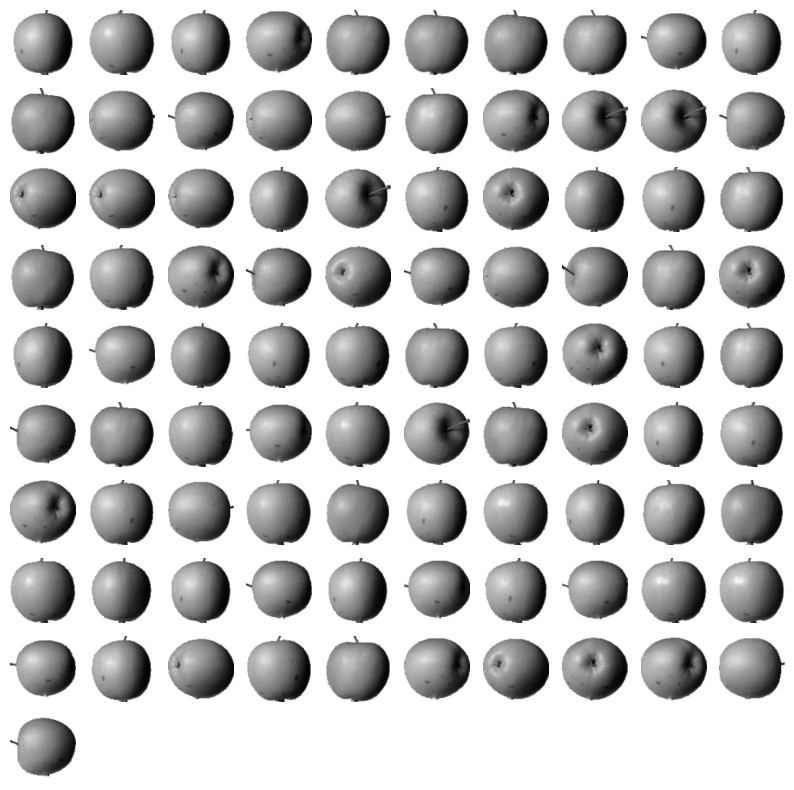

In [91]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

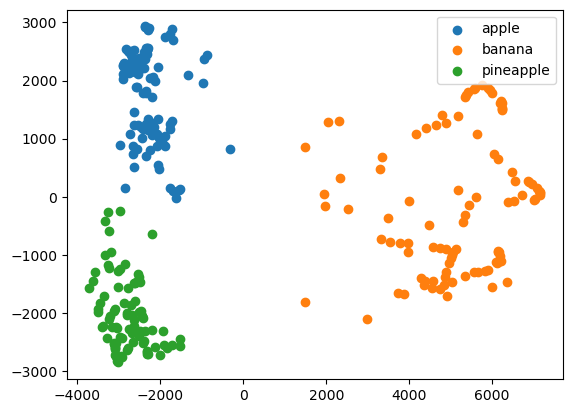

In [93]:
# 훈련 데이터의 차원은 3개 이하로 줄이면 시각화가 가능하다는 장점
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:,1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

주성분 분석의 장점
- 데이터의 크기를 줄일 수 있고 데이터 시각화가 쉽다
- 차원 축소된 데이터를 모델 학습 데이터로 사용해 성능을 높이거나 훈련 속도를 빠르게 만들 수 있다.